*texte en italique*# Étape 1 : recuperation des données

In [1]:


# Lire les données (avec suppression des espaces inutiles autour des valeurs)
myData <- read.table("adult.csv", sep = ",", header = TRUE, stringsAsFactors = FALSE, strip.white = TRUE)



## supression de toute les lignes ayant un ? dedans

In [2]:
# Nombre de lignes avant nettoyage
initial_rows <- nrow(myData)

# Supprimer les lignes contenant au moins un "?"
rows_with_question <- apply(myData, 1, function(row) any(trimws(row) == "?"))
myData <- myData[!rows_with_question, ]

# Nombre de lignes après nettoyage
cleaned_rows <- nrow(myData)

# Résumé
cat(" Lignes initiales :", initial_rows, "\n")
cat(" Lignes supprimées car contenant un ou plusieurs ? :", initial_rows - cleaned_rows, "\n")
cat(" Lignes restantes :", cleaned_rows, "\n")



 Lignes initiales : 32561 
 Lignes supprimées car contenant un ou plusieurs ? : 2399 
 Lignes restantes : 30162 


Affichage des colones du fichier

In [3]:
#affichage de tous les noms de colonnes
colnames(myData)


[1] "age"            "workclass"      "fnlwgt"         "education"     
 [5] "education.num"  "marital.status" "occupation"     "relationship"  
 [9] "race"           "sex"            "capital.gain"   "capital.loss"  
[13] "hours.per.week" "native.country" "income"

Affichage d'un resumer des datas

In [4]:
summary(myData)

      age         workclass             fnlwgt         education        
 Min.   :17.00   Length:30162       Min.   :  13769   Length:30162      
 1st Qu.:28.00   Class :character   1st Qu.: 117627   Class :character  
 Median :37.00   Mode  :character   Median : 178425   Mode  :character  
 Mean   :38.44                      Mean   : 189794                     
 3rd Qu.:47.00                      3rd Qu.: 237629                     
 Max.   :90.00                      Max.   :1484705                     
 education.num   marital.status      occupation        relationship      
 Min.   : 1.00   Length:30162       Length:30162       Length:30162      
 1st Qu.: 9.00   Class :character   Class :character   Class :character  
 Median :10.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :10.12                                                           
 3rd Qu.:13.00                                                           
 Max.   :16.00                               

# TP1 A : ANALYSE QUALITATIVE
###  for sure :Work class / education / occupation / specialty
### to check: native country  / race / sex

### setup des marges et de la police pour des graphiques plus lisibles

In [5]:

#par(mar = c(6, 6, 6, 6),cex.names = 0.01) # Ajuste les marges de la fenêtre graphique et la taille de police des champs
par(mar = c(8, 8, 6, 6),  cex.axis = 0.1)  # Augmenter les marges et ajuster la taille de la police


## workclass

                  income
workclass          <=50K  >50K
  Federal-gov        578   365
  Local-gov         1458   609
  Private          17410  4876
  Self-emp-inc       474   600
  Self-emp-not-inc  1785   714
  State-gov          935   344
  Without-pay         14     0

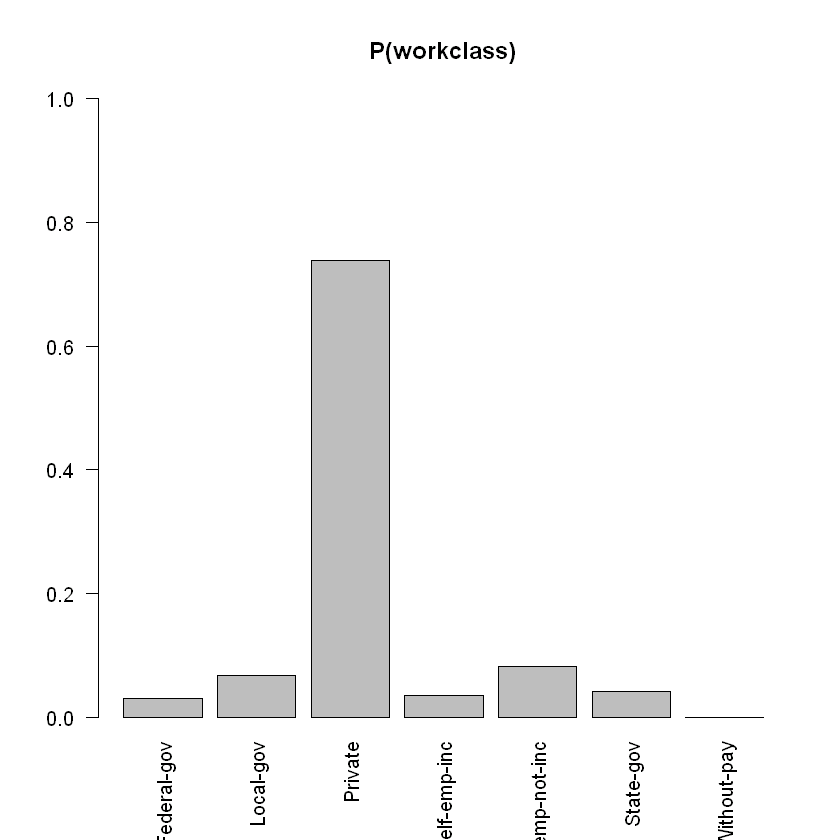

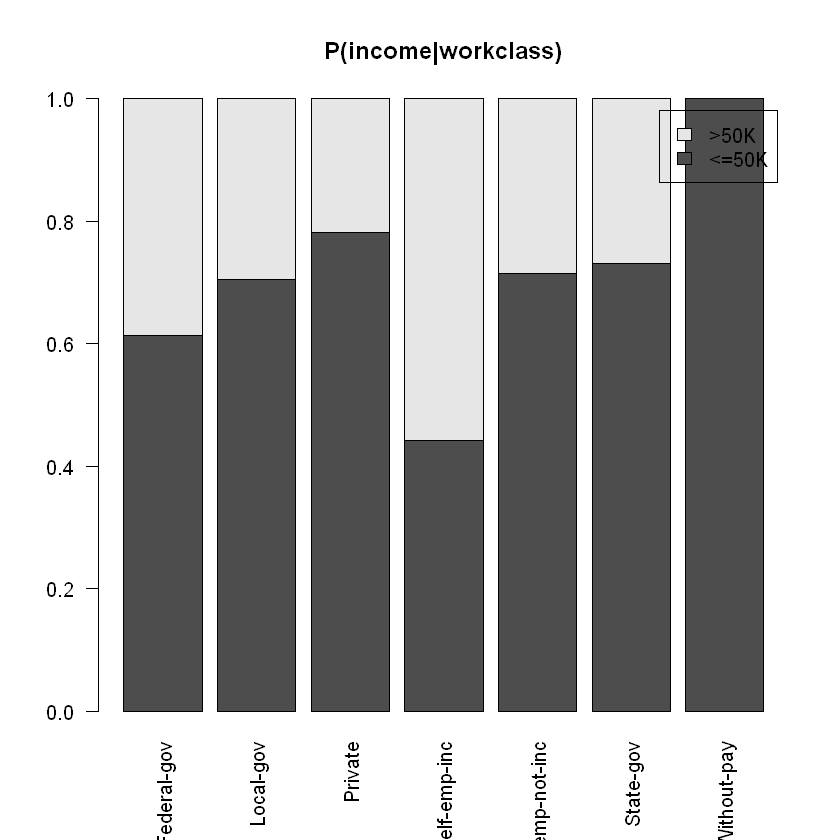

In [6]:

table(myData[, c(2, 15)])


barplot(prop.table(table(myData[, c(2)])), main = "P(workclass)", legend = F, beside = FALSE,  las = 2,ylim = c(0,1))
barplot(t(prop.table(table(myData[, c(2, 15)]), 1)), main = "P(income|workclass)", legend = TRUE, beside = FALSE, las = 2)


## Education

              income
education      <=50K >50K
  10th           761   59
  11th           989   59
  12th           348   29
  1st-4th        145    6
  5th-6th        276   12
  7th-8th        522   35
  9th            430   25
  Assoc-acdm     752  256
  Assoc-voc      963  344
  Bachelors     2918 2126
  Doctorate       95  280
  HS-grad       8223 1617
  Masters        709  918
  Preschool       45    0
  Prof-school    136  406
  Some-college  5342 1336

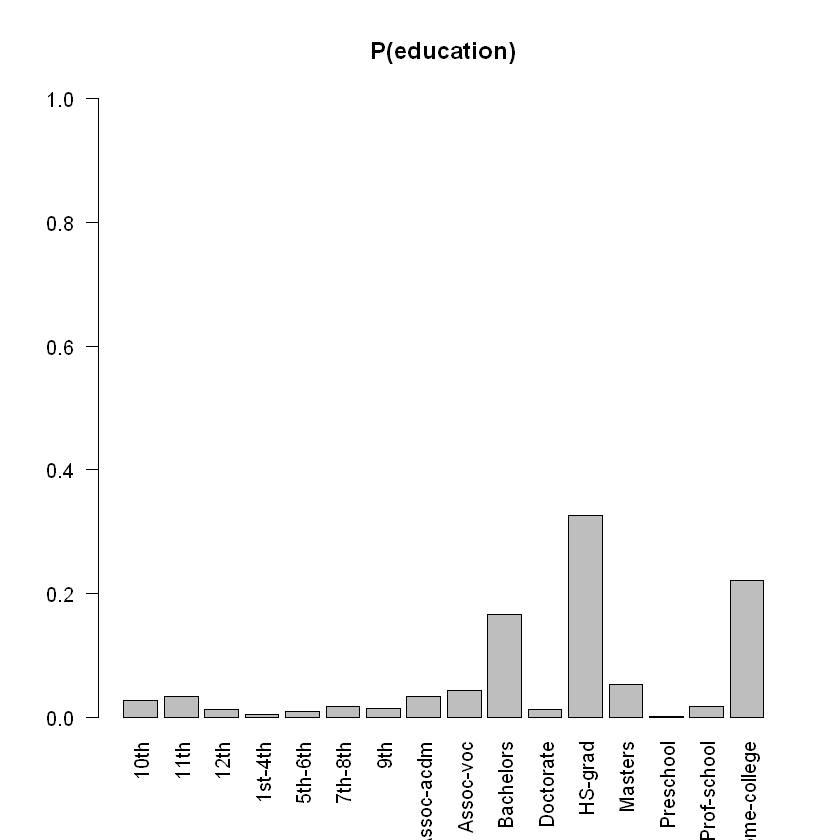

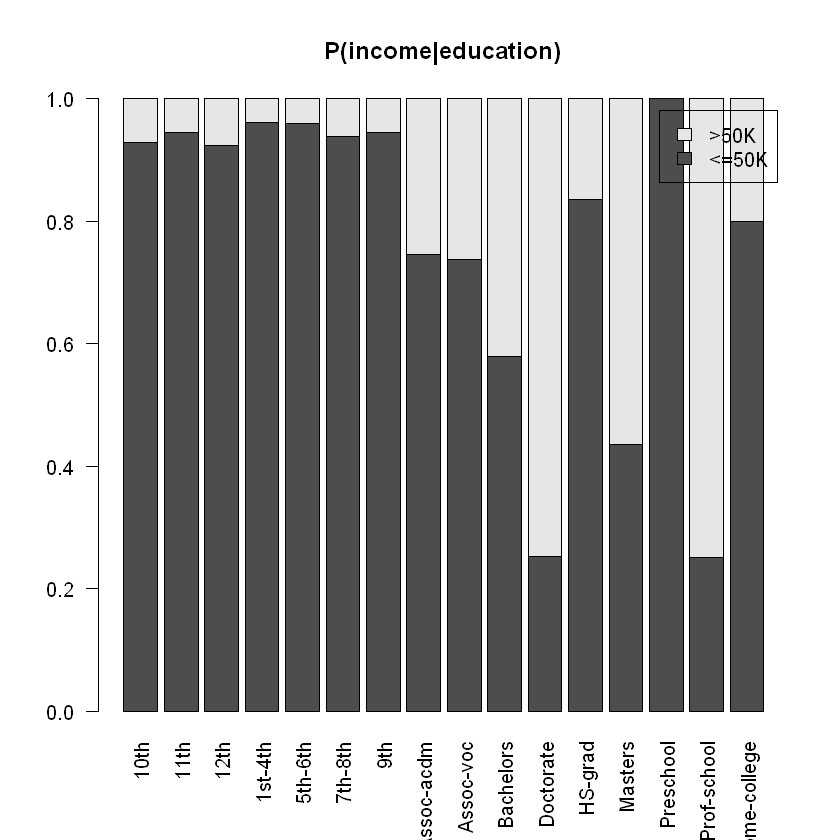

In [7]:
table(myData[, c(4, 15)])


barplot(prop.table(table(myData[, c(4)])), main = "P(education)", legend = F, beside = FALSE, las = 2,ylim = c(0,1))
barplot(t(prop.table(table(myData[, c(4, 15)]), 1)), main = "P(income|education)", legend = TRUE, beside = FALSE,  las = 2)


## Occupation

                   income
occupation          <=50K >50K
  Adm-clerical       3223  498
  Armed-Forces          8    1
  Craft-repair       3122  908
  Exec-managerial    2055 1937
  Farming-fishing     874  115
  Handlers-cleaners  1267   83
  Machine-op-inspct  1721  245
  Other-service      3080  132
  Priv-house-serv     142    1
  Prof-specialty     2227 1811
  Protective-serv     434  210
  Sales              2614  970
  Tech-support        634  278
  Transport-moving   1253  319


     Adm-clerical      Armed-Forces      Craft-repair   Exec-managerial 
     0.1233671507      0.0002983887      0.1336118295      0.1323519660 
  Farming-fishing Handlers-cleaners Machine-op-inspct     Other-service 
     0.0327896028      0.0447583052      0.0651813540      0.1064916120 
  Priv-house-serv    Prof-specialty   Protective-serv             Sales 
     0.0047410649      0.1338770639      0.0213513693      0.1188250116 
     Tech-support  Transport-moving 
     0.0302367217      0.0521185598 

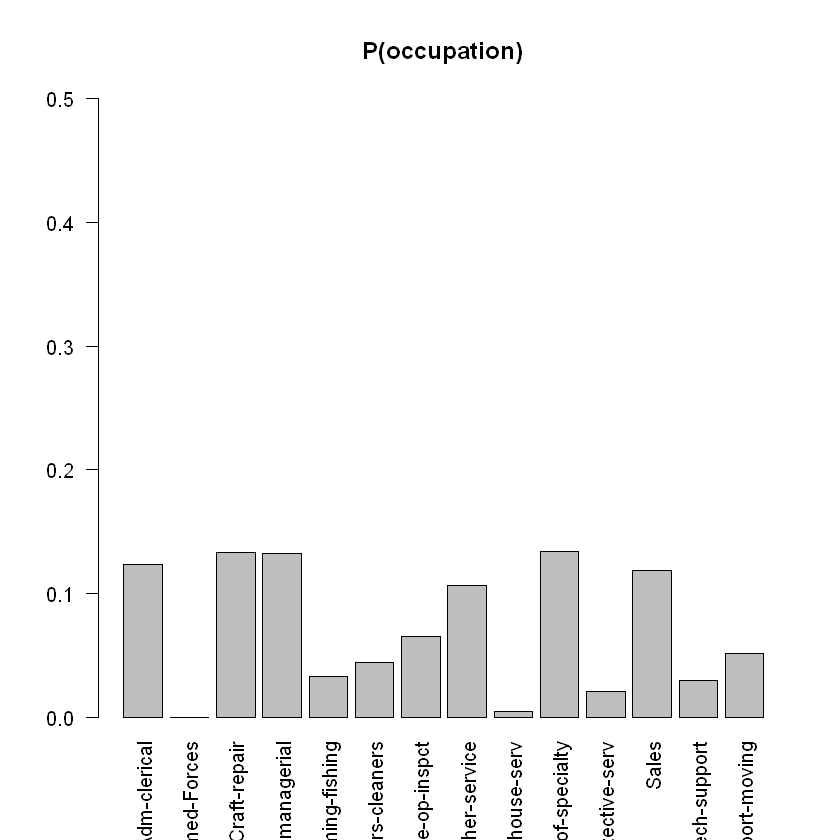

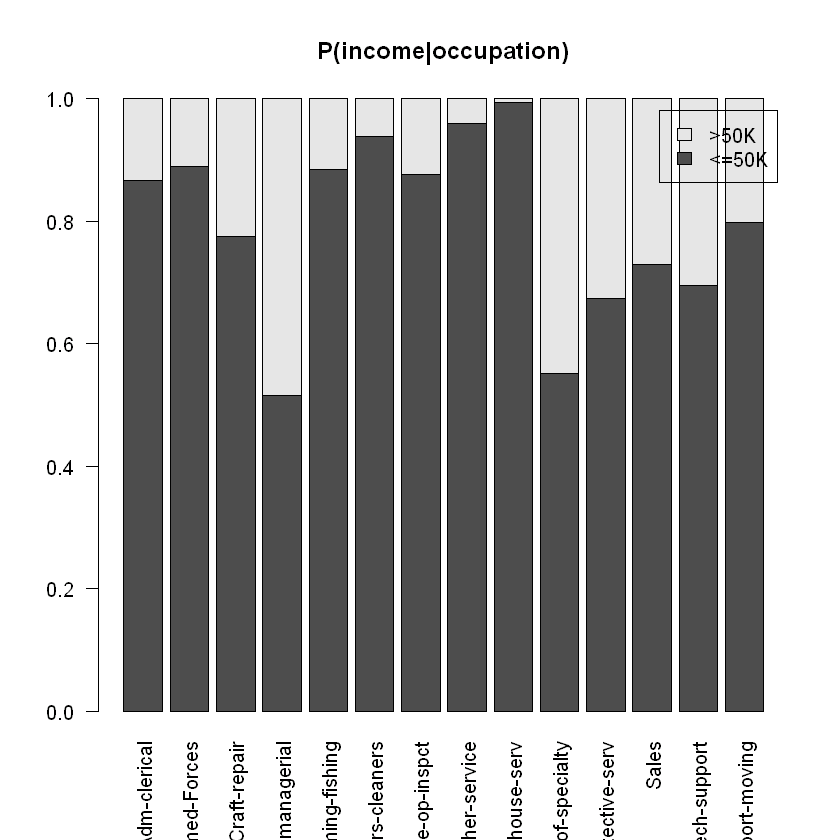

In [8]:
table(myData[, c(7, 15)])
prop.table(table(myData[, c(7)]))


barplot(prop.table(table(myData[, c(7)])), main = "P(occupation)", legend = F, beside = FALSE, las = 2,ylim = c(0,0.5))
barplot(t(prop.table(table(myData[, c(7, 15)]), 1)), main = "P(income|occupation)", legend = TRUE, beside = FALSE,  las = 2)


## Native country

                            income
native.country               <=50K  >50K
  Cambodia                      11     7
  Canada                        71    36
  China                         48    20
  Columbia                      54     2
  Cuba                          67    25
  Dominican-Republic            65     2
  Ecuador                       23     4
  El-Salvador                   91     9
  England                       56    30
  France                        15    12
  Germany                       84    44
  Greece                        21     8
  Guatemala                     60     3
  Haiti                         38     4
  Holand-Netherlands             1     0
  Honduras                      11     1
  Hong                          13     6
  Hungary                       10     3
  India                         60    40
  Iran                          24    18
  Ireland                       19     5
  Italy                         44    24
  Jamaica             


                  Cambodia                     Canada 
              0.0005967774               0.0035475101 
                     China                   Columbia 
              0.0022544924               0.0018566408 
                      Cuba         Dominican-Republic 
              0.0030501956               0.0022213381 
                   Ecuador                El-Salvador 
              0.0008951661               0.0033154300 
                   England                     France 
              0.0028512698               0.0008951661 
                   Germany                     Greece 
              0.0042437504               0.0009614747 
                 Guatemala                      Haiti 
              0.0020887209               0.0013924806 
        Holand-Netherlands                   Honduras 
              0.0000331543               0.0003978516 
                      Hong                    Hungary 
              0.0006299317               0.0004310059 
         

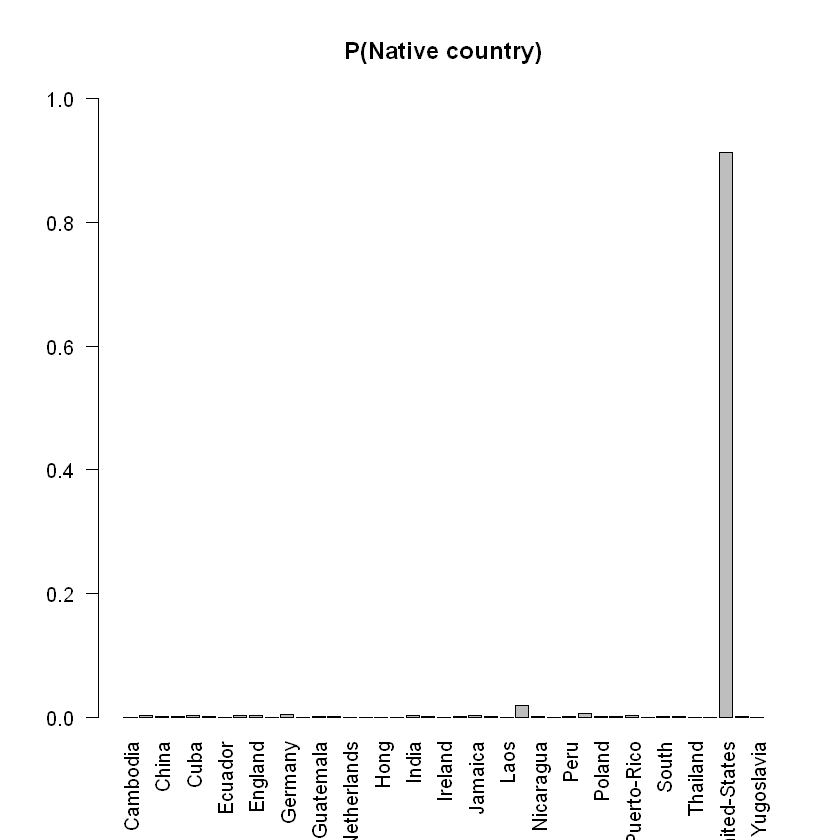

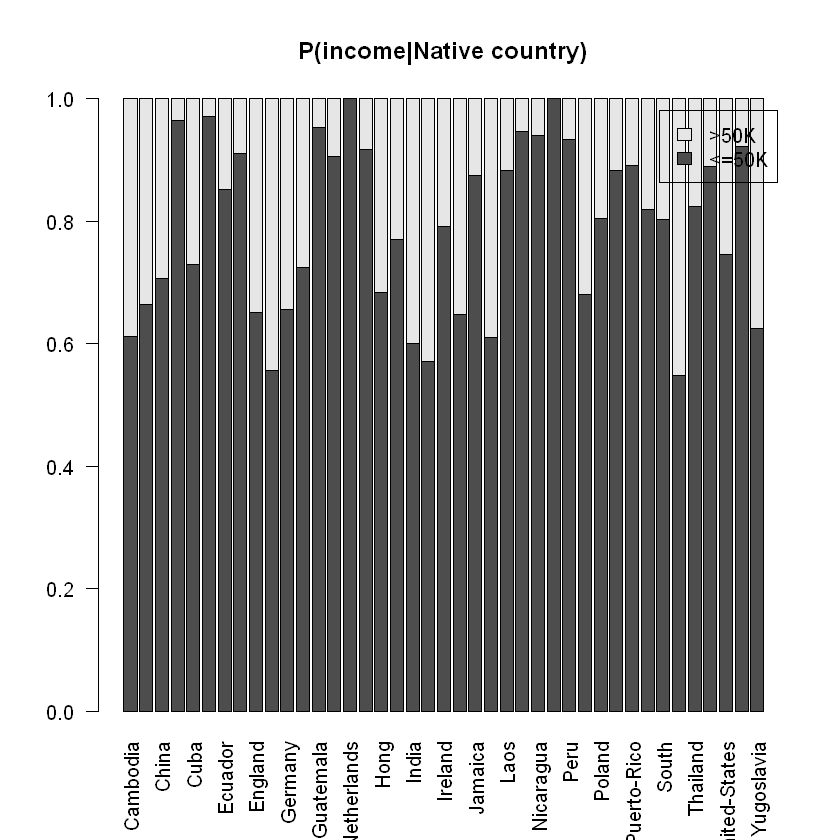

In [9]:
table(myData[, c(14, 15)])
prop.table(table(myData[, c(14)]))


barplot(prop.table(table(myData[, c(14)])), main = "P(Native country)", legend = F, beside = FALSE, las = 2,ylim = c(0,1))
barplot(t(prop.table(table(myData[, c(14, 15)]), 1)), main = "P(income|Native country)", legend = TRUE, beside = FALSE,  las = 2)


## Marital status

                       income
marital.status          <=50K >50K
  Divorced               3762  452
  Married-AF-spouse        11   10
  Married-civ-spouse     7666 6399
  Married-spouse-absent   339   31
  Never-married          9256  470
  Separated               873   66
  Widowed                 747   80


             Divorced     Married-AF-spouse    Married-civ-spouse 
         0.1397122207          0.0006962403          0.4663152311 
Married-spouse-absent         Never-married             Separated 
         0.0122670910          0.3224587229          0.0311318878 
              Widowed 
         0.0274186062 

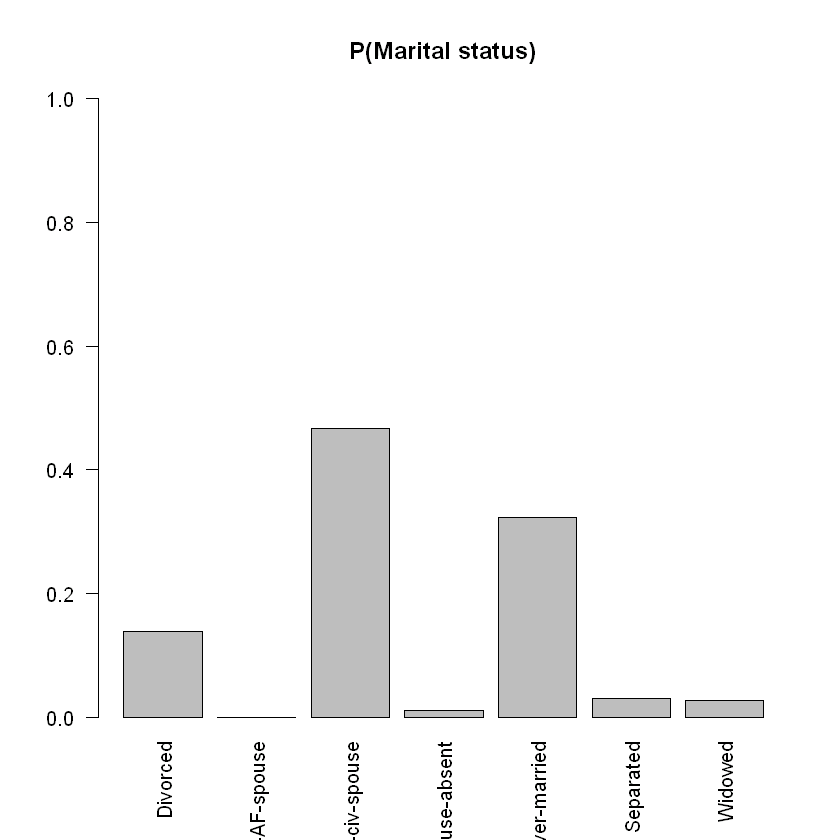

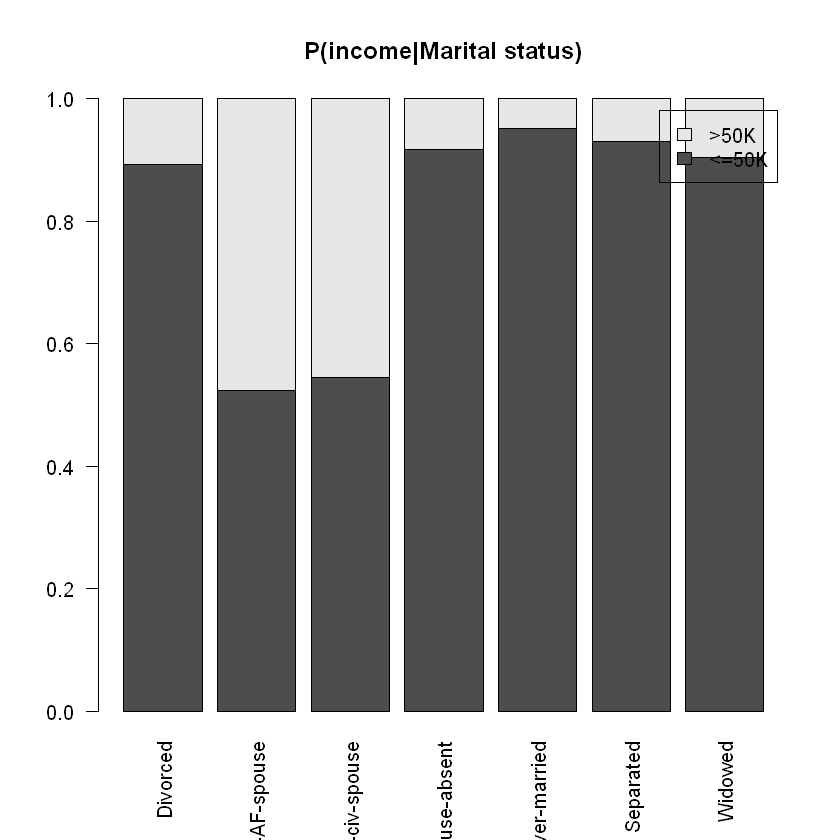

In [10]:
table(myData[, c(6, 15)])
prop.table(table(myData[, c(6)]))


barplot(prop.table(table(myData[, c(6)])), main = "P(Marital status)", legend = F, beside = FALSE, las = 2,ylim = c(0,1))
barplot(t(prop.table(table(myData[, c(6, 15)]), 1)), main = "P(income|Marital status)", legend = TRUE, beside = FALSE,  las = 2)


## Relashionship

                income
relationship     <=50K >50K
  Husband         6784 5679
  Not-in-family   6903  823
  Other-relative   854   35
  Own-child       4402   64
  Unmarried       2999  213
  Wife             712  694


       Husband  Not-in-family Other-relative      Own-child      Unmarried 
    0.41320204     0.25615012     0.02947417     0.14806710     0.10649161 
          Wife 
    0.04661495 

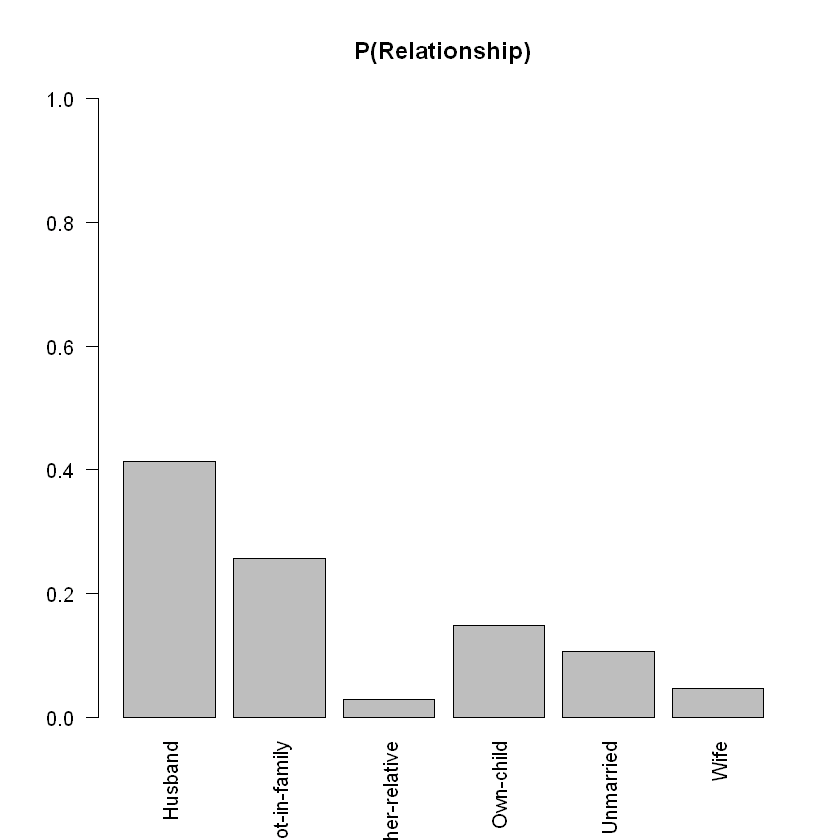

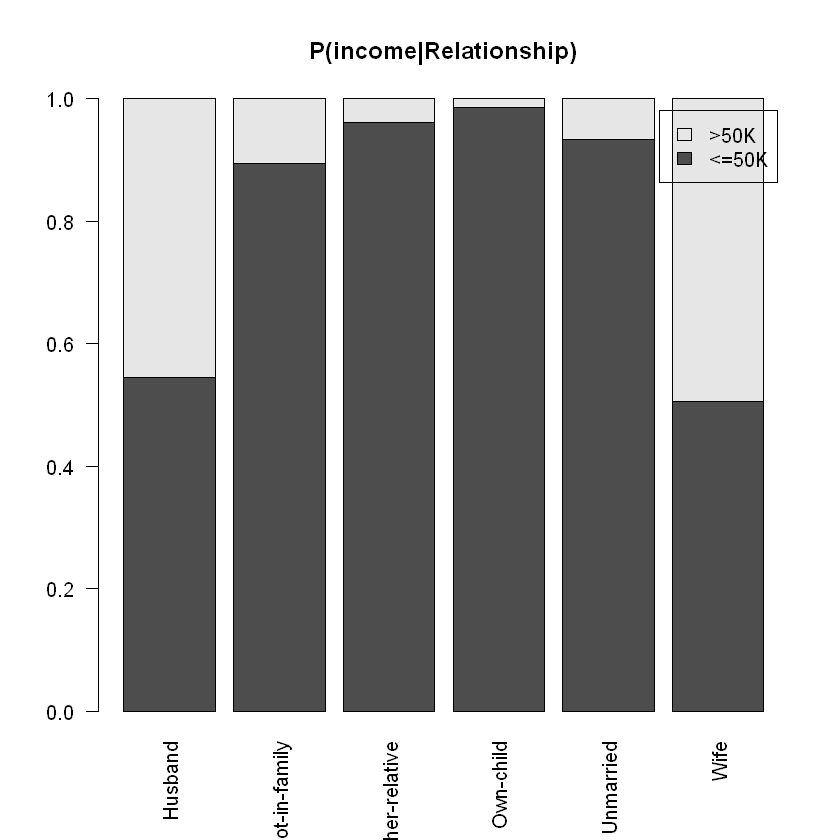

In [11]:
table(myData[, c(8, 15)])
prop.table(table(myData[, c(8)]))


barplot(prop.table(table(myData[, c(8)])), main = "P(Relationship)", legend = F, beside = FALSE, las = 2,ylim = c(0,1))
barplot(t(prop.table(table(myData[, c(8, 15)]), 1)), main = "P(income|Relationship)", legend = TRUE, beside = FALSE,  las = 2)


## Race

                    income
race                 <=50K  >50K
  Amer-Indian-Eskimo   252    34
  Asian-Pac-Islander   647   248
  Black               2451   366
  Other                210    21
  White              19094  6839


Amer-Indian-Eskimo Asian-Pac-Islander              Black              Other 
       0.009482130        0.029673099        0.093395663        0.007658643 
             White 
       0.859790465 

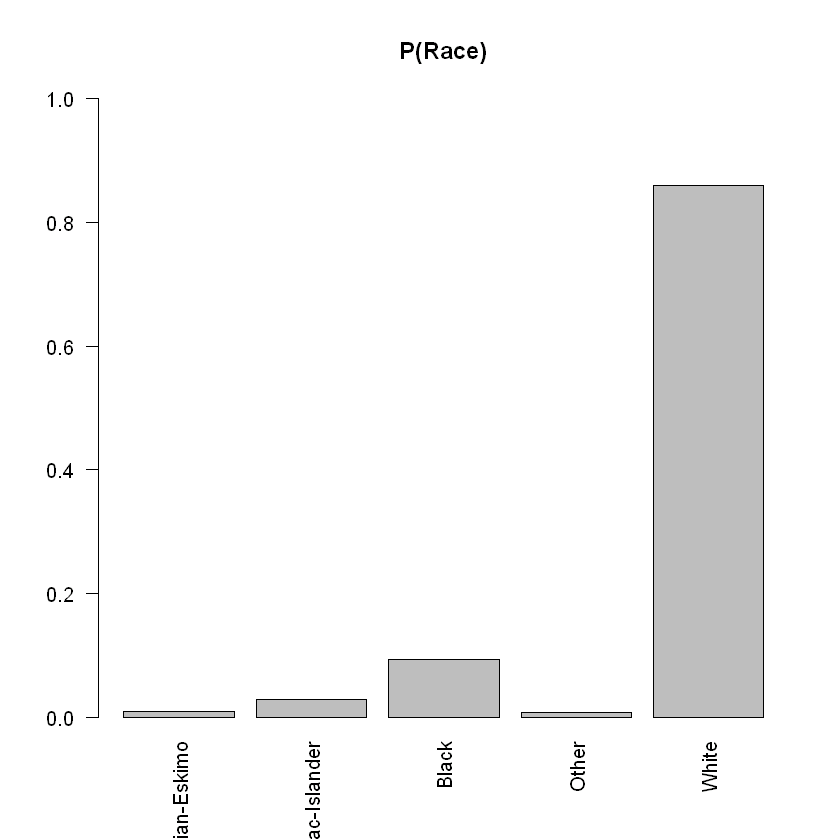

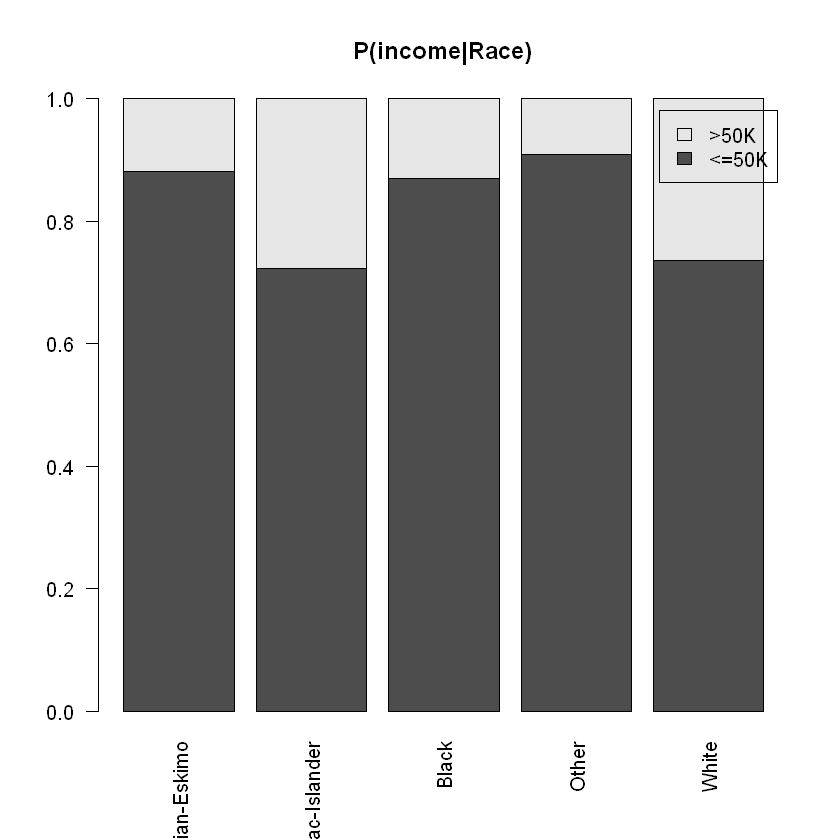

In [12]:
table(myData[, c(9, 15)])
prop.table(table(myData[, c(9)]))


barplot(prop.table(table(myData[, c(9)])), main = "P(Race)", legend = F, beside = FALSE, las = 2,ylim = c(0,1))
barplot(t(prop.table(table(myData[, c(9, 15)]), 1)), main = "P(income|Race)", legend = TRUE, beside = FALSE,  las = 2)


## QualitativeAttrsTheory

In [13]:
# Distribution conjointe P(f, y)
joint_dist <- prop.table(table(myData[, 7], myData[, 15]))

# Afficher la table
print(joint_dist)


                   
                           <=50K         >50K
  Adm-clerical      0.1068563093 0.0165108415
  Armed-Forces      0.0002652344 0.0000331543
  Craft-repair      0.1035077250 0.0301041045
  Exec-managerial   0.0681320867 0.0642198793
  Farming-fishing   0.0289768583 0.0038127445
  Handlers-cleaners 0.0420064982 0.0027518069
  Machine-op-inspct 0.0570585505 0.0081228035
  Other-service     0.1021152443 0.0043763676
  Priv-house-serv   0.0047079106 0.0000331543
  Prof-specialty    0.0738346264 0.0600424375
  Protective-serv   0.0143889662 0.0069624030
  Sales             0.0866653405 0.0321596711
  Tech-support      0.0210198263 0.0092168954
  Transport-moving  0.0415423380 0.0105762217


In [14]:

# Marginale P(y) : somme sur les colonnes
marginal_y <- colSums(joint_dist)

# Marginale P(f) : somme sur les lignes
marginal_f <- rowSums(joint_dist)

# Affichage
print("--- P(f) ---")
print(marginal_f)

print("--- P(y) ---")
print(marginal_y)
# Calcul de P(f | y)
cond_f_given_y <- sweep(joint_dist, 2, marginal_y, FUN = "/")
print("--- P(f | y) ---")
print(cond_f_given_y)
print("Verification")
print(colSums(cond_f_given_y)) # Vérification de la somme des colonnes
# Calcul de P(y | f)
cond_y_given_f <- sweep(joint_dist, 1, marginal_f, FUN = "/")
print("--- P(y | f) ---")
print(cond_y_given_f)

print("Verification")
print(rowSums(cond_y_given_f)) # Vérification de la somme des colonnes


[1] "--- P(f) ---"
     Adm-clerical      Armed-Forces      Craft-repair   Exec-managerial 
     0.1233671507      0.0002983887      0.1336118295      0.1323519660 
  Farming-fishing Handlers-cleaners Machine-op-inspct     Other-service 
     0.0327896028      0.0447583052      0.0651813540      0.1064916120 
  Priv-house-serv    Prof-specialty   Protective-serv             Sales 
     0.0047410649      0.1338770639      0.0213513693      0.1188250116 
     Tech-support  Transport-moving 
     0.0302367217      0.0521185598 


[1] "--- P(y) ---"
    <=50K      >50K 
0.7510775 0.2489225 
[1] "--- P(f | y) ---"
                   
                           <=50K         >50K
  Adm-clerical      0.1422706807 0.0663292488
  Armed-Forces      0.0003531385 0.0001331913
  Craft-repair      0.1378123069 0.1209376665
  Exec-managerial   0.0907124570 0.2579914758
  Farming-fishing   0.0385803832 0.0153169952
  Handlers-cleaners 0.0559283129 0.0110548748
  Machine-op-inspct 0.0759689238 0.0326318594
  Other-service     0.1359583297 0.0175812467
  Priv-house-serv   0.0062682087 0.0001331913
  Prof-specialty    0.0983049351 0.2412093767
  Protective-serv   0.0191577646 0.0279701652
  Sales             0.1153880109 0.1291955248
  Tech-support      0.0279862276 0.0370271710
  Transport-moving  0.0553103205 0.0424880128
[1] "Verification"
<=50K  >50K 
    1     1 
[1] "--- P(y | f) ---"
                   
                          <=50K        >50K
  Adm-clerical      0.866165009 0.133834991
  Armed-Forces      0.88888888

In [15]:
QualitativeAttrsTheory <- function(data, col_f, col_y) {
    # Distribution conjointe P(f, y)
    joint_dist <- prop.table(table(data[[col_f]], data[[col_y]]))

    cat("--- Distribution conjointe P(f, y) ---\n")
    print(joint_dist)

    # Marginale P(y) : somme sur les colonnes
    marginal_y <- colSums(joint_dist)

    # Marginale P(f) : somme sur les lignes
    marginal_f <- rowSums(joint_dist)

    cat("\n--- P(f) ---\n")
    print(marginal_f)

    cat("\n--- P(y) ---\n")
    print(marginal_y)

    # Calcul de P(f | y)
    cond_f_given_y <- sweep(joint_dist, 2, marginal_y, FUN = "/")
    cat("\n--- P(f | y) ---\n")
    print(cond_f_given_y)

    cat("\nVérification P(f | y):\n")
    print(colSums(cond_f_given_y)) # doit être proche de 1

    # Calcul de P(y | f)
    cond_y_given_f <- sweep(joint_dist, 1, marginal_f, FUN = "/")
    cat("\n--- P(y | f) ---\n")
    print(cond_y_given_f)

    cat("\nVérification P(y | f):\n")
    print(rowSums(cond_y_given_f)) # doit être proche de 1
}

QualitativeAttrsTheory(myData, 7, 15)



--- Distribution conjointe P(f, y) ---
                   
                           <=50K         >50K
  Adm-clerical      0.1068563093 0.0165108415
  Armed-Forces      0.0002652344 0.0000331543
  Craft-repair      0.1035077250 0.0301041045
  Exec-managerial   0.0681320867 0.0642198793
  Farming-fishing   0.0289768583 0.0038127445
  Handlers-cleaners 0.0420064982 0.0027518069
  Machine-op-inspct 0.0570585505 0.0081228035
  Other-service     0.1021152443 0.0043763676
  Priv-house-serv   0.0047079106 0.0000331543
  Prof-specialty    0.0738346264 0.0600424375
  Protective-serv   0.0143889662 0.0069624030
  Sales             0.0866653405 0.0321596711
  Tech-support      0.0210198263 0.0092168954
  Transport-moving  0.0415423380 0.0105762217

--- P(f) ---
     Adm-clerical      Armed-Forces      Craft-repair   Exec-managerial 
     0.1233671507      0.0002983887      0.1336118295      0.1323519660 
  Farming-fishing Handlers-cleaners Machine-op-inspct     Other-service 
     0.0327896028 

# TP1 B : ANALYSE QUANTITATIVE

### installation package

In [16]:
# Install and load the latex2exp package, for printing mathematical symbols in R
packageName<-"latex2exp" #install the arules library that provides the discretization function
if (!require(packageName, character.only = TRUE)) {
install.packages(packageName)
library(packageName, character.only = TRUE)
}
#arules requires R version >=4.0
R.version.string

#lets discretize z and repeat the analysis that we did with qualitative attributes, i.e. probabilities and bar plots
packageName<-"arules" #install the arules library that provides the discretization function
if (!require(packageName, character.only = TRUE)) {
install.packages(packageName)
library(packageName, character.only = TRUE)
}

Le chargement a nécessité le package : latex2exp

Warning message:
"le package 'latex2exp' a été compilé avec la version R 4.4.3"


[1] "R version 4.4.2 (2024-10-31 ucrt)"

Le chargement a nécessité le package : arules

Warning message:
"le package 'arules' a été compilé avec la version R 4.4.3"
Le chargement a nécessité le package : Matrix


Attachement du package : 'arules'


Les objets suivants sont masqués depuis 'package:base':

    abbreviate, write




In [17]:
colnames(myData)


[1] "age"            "workclass"      "fnlwgt"         "education"     
 [5] "education.num"  "marital.status" "occupation"     "relationship"  
 [9] "race"           "sex"            "capital.gain"   "capital.loss"  
[13] "hours.per.week" "native.country" "income"

In [18]:
# Définir la fonction pour générer l'histogramme avec les paramètres spécifiés
plot_histogram <- function(field_index, target_index, num_breaks) {

  # Récupérer le jeu de données 'myData' globalement
  data <- myData
  # Extraire les colonnes à partir des indices
  field <- data[, field_index]  # Le champ à analyser (par exemple, "age")
  target <- data[, target_index]  # La variable cible (par exemple, "income")

  # Récupérer les noms des colonnes
  field_name <- colnames(data)[field_index]  # Nom de la colonne à analyser
  target_name <- colnames(data)[target_index]  # Nom de la variable cible

  # Calculer les coupures avec le nombre de bins spécifié
  breaks <- seq(from = min(field), to = max(field), length.out = num_breaks)

 # 1. Histogramme global (distribution de la variable seule)
  hist(field,
       breaks = breaks,
       col = "skyblue",
       main = paste("Distribution de", field_name),
       xlab = field_name,
       freq = TRUE)

  # 2. Histogramme conditionnel superposé : P(field | target)
  hist(field[target == "<=50K"],
       breaks = breaks,
       col = rgb(1, 0, 0, 0.5),
       xlab = field_name,
       main = paste("P(", field_name, " | ", target_name, ")", sep = ""),
       freq = TRUE,
       xaxt = "n")

  hist(field[target == ">50K"],
       breaks = breaks,
       col = rgb(0, 1, 0, 0.5),
       freq = TRUE,
       add = TRUE)


  # Ajouter l'axe des x avec plus de valeurs
  axis(1, at = seq(min(field), max(field), by = 2))

  # Ajouter une légende
  legend("topright",
         legend = c("<=50K", ">50K"),
         fill = c(rgb(1, 0, 0, 0.5), rgb(0, 1, 0, 0.5)))
}

In [19]:
plot_scatter <- function(x_index, y_index, target_index) {
  data <- myData

  x <- data[[x_index]]
  y <- data[[y_index]]
  target <- data[[target_index]]

  x_name <- colnames(data)[x_index]
  y_name <- colnames(data)[y_index]
  target_name <- colnames(data)[target_index]

  # Définir des couleurs selon la cible
  colors <- ifelse(target == ">50K", "darkgreen", "red")



  # Créer le scatter plot
  plot(x, y,
       col = colors,
       pch = 19,
       xlab = x_name,
       ylab = y_name,
       main = paste("Diagramme de dispersion :", y_name, "vs", x_name))

  # Ajouter la légende
  legend("topright",
         legend = c("<=50K", ">50K"),
         col = c("red", "darkgreen"),
         pch = 19)
}


In [20]:
stat_Attribut <- function(x_index, group_index) {
  data <- myData

  # Extraire les colonnes à partir des indices
  field <- data[, x_index]
  group <- data[, group_index]

  # Obtenir les noms des colonnes
  attr_name <- colnames(data)[x_index]
  group_name <- colnames(data)[group_index]

  # Moyenne, variance, écart-type global
  mean_global <- mean(field)
  var_global <- mean((field - mean_global)^2)
  sd_global <- sqrt(var_global)

  # Moyennes conditionnelles
  means_by_class <- tapply(field, group, mean)
  vars_by_class <- tapply(field, group, function(x) mean((x - mean(x))^2))
  sds_by_class <- sqrt(vars_by_class)

  # Différence de moyennes
  diff_means <- abs(diff(means_by_class))

  # Score d’importance
  score <- diff_means / sd_global

  # Affichage structuré
  cat("📌 Analyse de l'attribut :", attr_name, "\n")
  cat("Moyenne globale       :", round(mean_global, 4), "\n")
  cat("Variance globale      :", round(var_global, 4), "\n")
  cat("Écart-type global     :", round(sd_global, 4), "\n\n")

  cat("📊 Moyennes par classe (", group_name, "):\n")
  print(round(means_by_class, 4))

  cat("\n📈 Variances par classe:\n")
  print(round(vars_by_class, 4))

  cat("\n📏 Écarts-types par classe:\n")
  print(round(sds_by_class, 4))

  cat("\n🔍 Différence de moyennes :", round(diff_means, 4), "\n")
  cat("📐 Score d'importance     :", round(score, 4), "\n")
  print("-------------------------------------  ")
}




### test function

In [21]:
#On commence par tester les scores de chaque attributs quantitiatif (sauf fnlwgt et income)
stat_Attribut(1, 15)
stat_Attribut(5, 15)
stat_Attribut(11, 15)
stat_Attribut(12, 15)
stat_Attribut(13, 15)

📌 Analyse de l'attribut : age 
Moyenne globale       : 38.4379 
Variance globale      : 172.5137 
Écart-type global     : 13.1344 

📊 Moyennes par classe ( income ):
  <=50K    >50K 
36.6081 43.9591 

📈 Variances par classe:
   <=50K     >50K 
181.2883 105.4513 

📏 Écarts-types par classe:
  <=50K    >50K 
13.4643 10.2689 

🔍 Différence de moyennes : 7.351 
📐 Score d'importance     : 0.5597 
[1] "-------------------------------------  "
📌 Analyse de l'attribut : education.num 
Moyenne globale       : 10.1213 
Variance globale      : 6.5023 
Écart-type global     : 2.55 

📊 Moyennes par classe ( income ):
  <=50K    >50K 
 9.6291 11.6064 

📈 Variances par classe:
 <=50K   >50K 
5.8252 5.6087 

📏 Écarts-types par classe:
 <=50K   >50K 
2.4135 2.3683 

🔍 Différence de moyennes : 1.9773 
📐 Score d'importance     : 0.7754 
[1] "-------------------------------------  "
📌 Analyse de l'attribut : capital.gain 
Moyenne globale       : 1092.008 
Variance globale      : 54852150 
Écart-type globa

In [22]:
# Indices des attributs quantitatifs (sans fnlwgt ni income)
indices_quant <- c(1, 5, 11, 12, 13)
attributs <- colnames(myData)[indices_quant]

# Créer le tableau
recap_etendu <- data.frame(
  Attribut = character(),
  Moyenne = numeric(),
  Variance = numeric(),
  Moyenne_Classe1 = numeric(),
  Moyenne_Classe2 = numeric(),
  Variance_Classe1 = numeric(),
  Variance_Classe2 = numeric(),
  Score = numeric()
)

for (i in indices_quant) {
  field <- myData[, i]
  income <- myData[, 15]

  # Moyenne et variance globales
  mean_global <- mean(field)
  var_global <- mean((field - mean_global)^2)
  sd_global <- sqrt(var_global)

  # Moyennes et variances conditionnelles
  means <- tapply(field, income, mean)
  vars <- tapply(field, income, function(x) mean((x - mean(x))^2))

  # Score d'importance
  diff_mean <- abs(diff(means))
  score <- diff_mean / sd_global

  # Ajouter au tableau
  recap_etendu <- rbind(recap_etendu, data.frame(
    Attribut = colnames(myData)[i],
    Moyenne = mean_global,
    Variance = var_global,
    Moyenne_Classe1 = means["<=50K"],
    Moyenne_Classe2 = means[">50K"],
    Variance_Classe1 = vars["<=50K"],
    Variance_Classe2 = vars[">50K"],
    Score = score
  ))
}

recap_etendu_rounded <- recap_etendu
recap_etendu_rounded[, 2:8] <- round(recap_etendu_rounded[, 2:8], 4)
print(recap_etendu_rounded)


             Attribut   Moyenne     Variance Moyenne_Classe1 Moyenne_Classe2
<=50K             age   38.4379 1.725137e+02         36.6081         43.9591
<=50K1  education.num   10.1213 6.502300e+00          9.6291         11.6064
<=50K2   capital.gain 1092.0079 5.485215e+07        148.8938       3937.6798
<=50K3   capital.loss   88.3725 1.634518e+05         53.4480        193.7507
<=50K4 hours.per.week   40.9312 1.435153e+02         39.3486         45.7066
       Variance_Classe1 Variance_Classe2  Score
<=50K          181.2883     1.054513e+02 0.5597
<=50K1           5.8252     5.608700e+00 0.7754
<=50K2      876791.7959     2.069312e+08 0.5116
<=50K3       96263.3866     3.513954e+05 0.3470
<=50K4         142.8147     1.152675e+02 0.5307


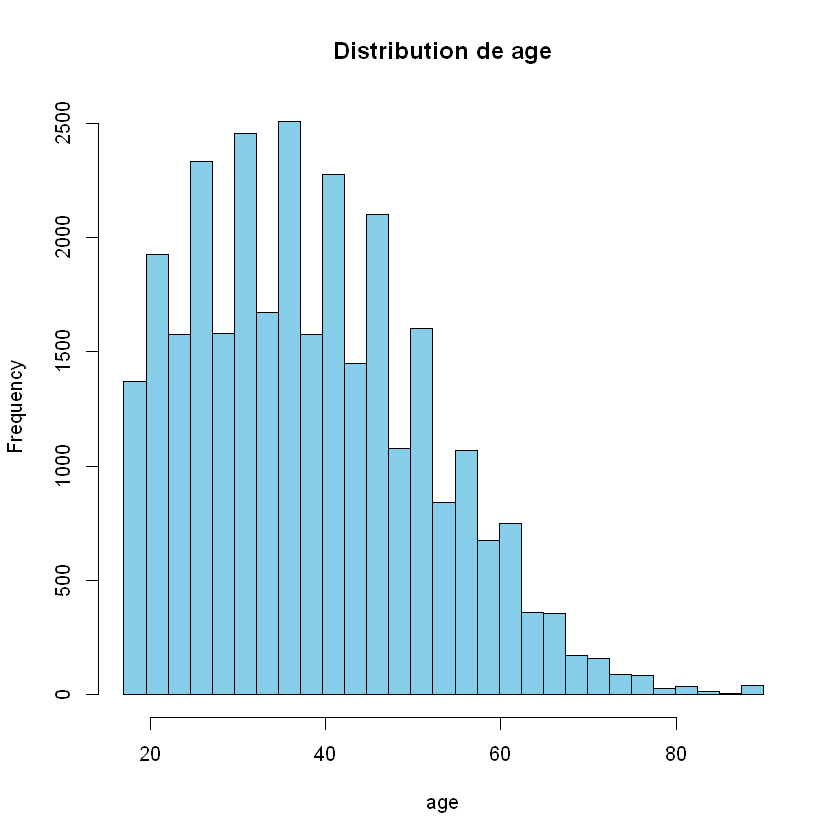

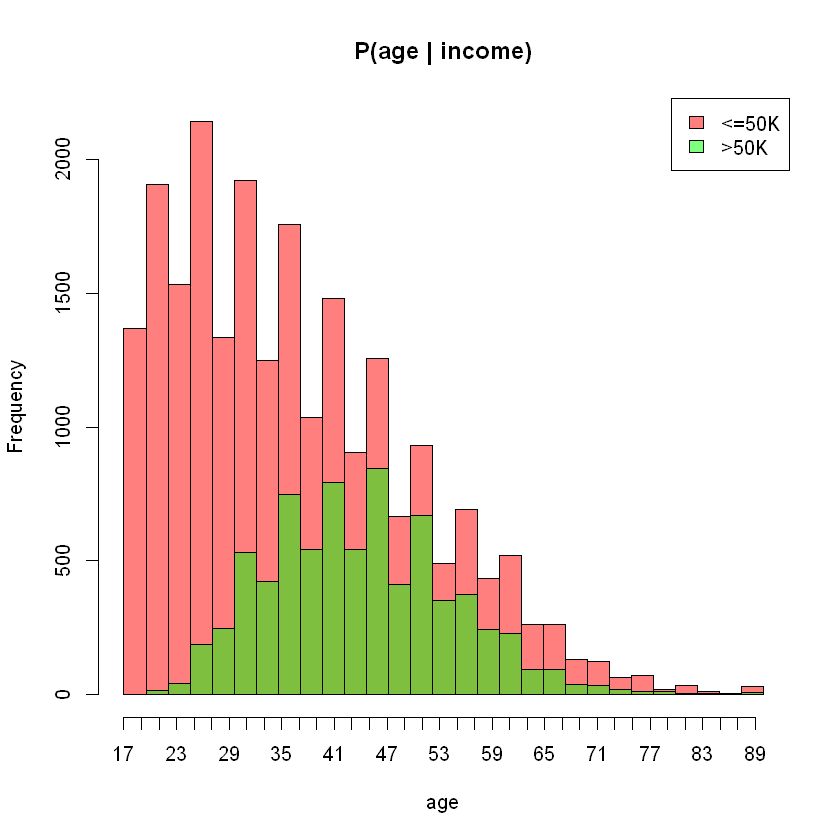

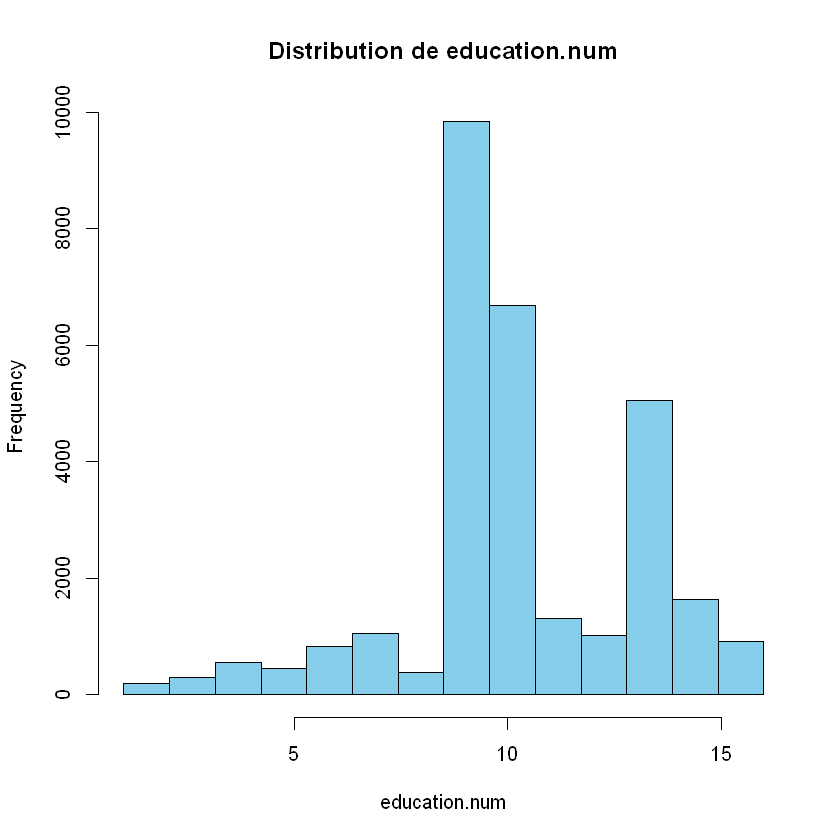

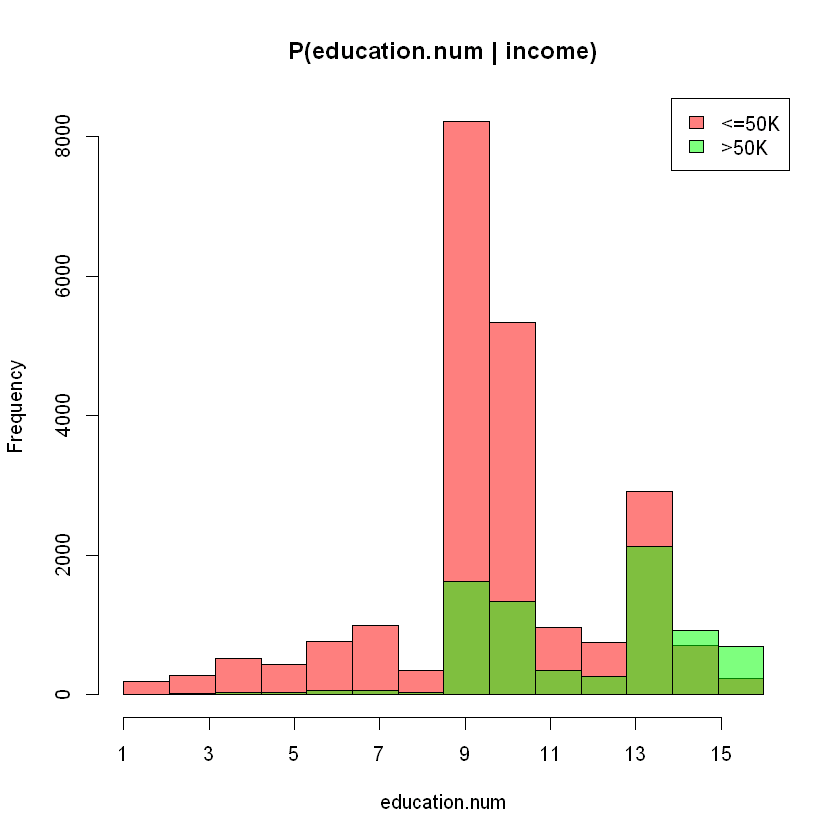

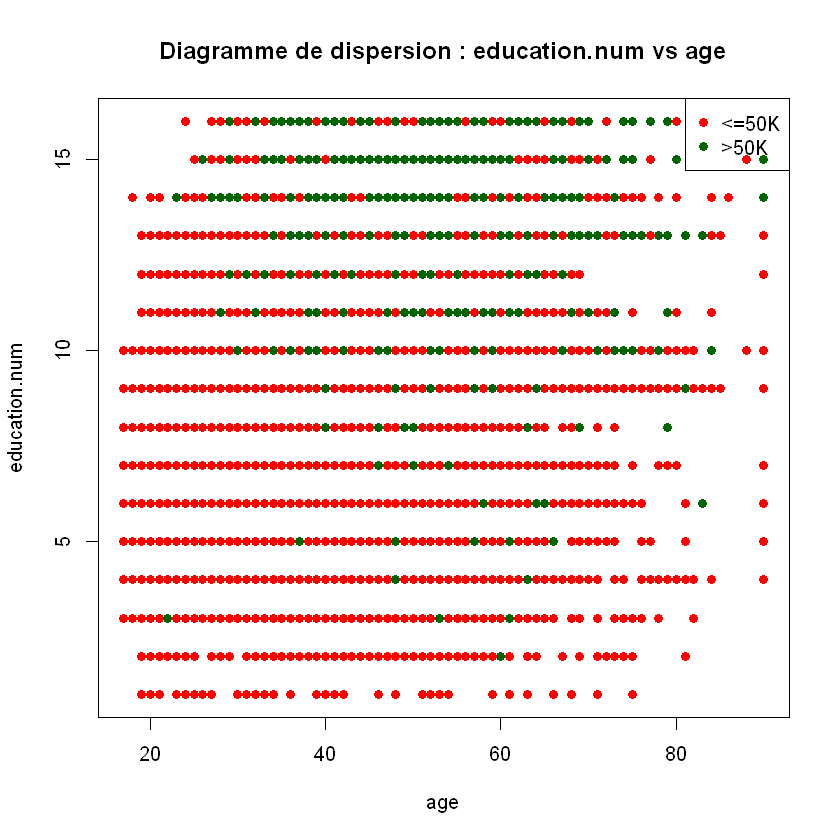

In [23]:
# age
plot_histogram(1,15,30)
plot_histogram(5,15,15)

plot_scatter(1,5,15)



In [ ]:
QuantitativeAttrsTheory <- function(data, f_index, target_index) {
  library(ggplot2)

  # Extraction des variables
  f <- data[[f_index]]
  y <- data[[target_index]]

  # Nettoyer NA si besoin
  df <- data.frame(f = f, y = y)
  df <- na.omit(df)

  # Moyenne et écart-type globaux
  mu <- mean(df$f)
  sigma <- sd(df$f)

  # Moyenne et écart-type par modalité de y
  stats_by_y <- aggregate(f ~ y, data = df, FUN = function(x) c(mean=mean(x), sd=sd(x)))
  # Réorganiser les résultats
  stats_by_y <- do.call(data.frame, stats_by_y)
  colnames(stats_by_y) <- c("y", "mean", "sd")

  # Histogramme de f global + courbe normale
  p1 <- ggplot(df, aes(x = f)) +
    geom_histogram(aes(y=..density..), bins=30, fill="skyblue", color="black", alpha=0.6) +
    stat_function(fun = dnorm, args = list(mean = mu, sd = sigma), color = "red", size=1) +
    ggtitle("Distribution globale de f avec loi normale")

  print(p1)

  # Histogramme de f par classe de y + courbes normales
  p2 <- ggplot(df, aes(x = f, fill = y)) +
    geom_histogram(aes(y=..density..), bins=30, alpha=0.5, position = "identity") +
    stat_function(data = stats_by_y, aes(color = y),
                  fun = function(x, mean, sd) dnorm(x, mean, sd),
                  args = list(mean = stats_by_y$mean, sd = stats_by_y$sd),
                  size=1, inherit.aes = FALSE) +
    facet_wrap(~ y) +
    ggtitle("Distribution de f conditionnelle à y")

  print(p2)

  # Discussion
  cat("Moyenne globale de f :", mu, "\n")
  cat("Écart-type global de f :", sigma, "\n\n")
  cat("Moyennes et écarts-types de f selon les classes de y :\n")
  print(stats_by_y)

  cat("\nDiscussion :\n")
  cat("- La distribution globale P(f) modélisée par une loi normale est basée sur la moyenne et l'écart-type globaux.\n")
  cat("- Les distributions conditionnelles P(f|y) changent car les moyennes et écarts-types sont calculés par classe de y.\n")
  cat("- Comparer les histogrammes avec les courbes normales permet d'évaluer si f suit bien une loi normale, globalement ou par classe.\n")
}

QuantitativeAttrsTheory(myData,  1, 15)


ERROR: Error in library(ggplot2): aucun package nommé 'ggplot2' n'est trouvé
